# Fractal Interpolation of 3 points

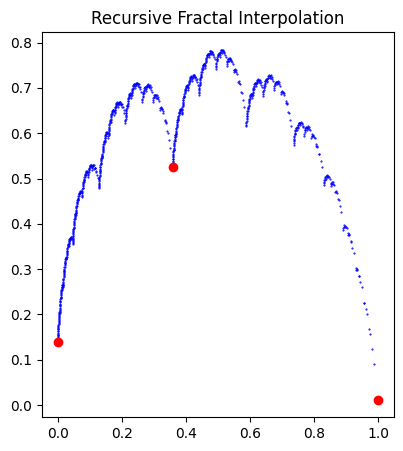

[0.4661875254327018, 0.6387053300563541]


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import random

points = [(0, random.random()), (random.random(), random.random()), (1, random.random())]
x_vals, y_vals = zip(*points)

x0, y0 = points[0]
xN, yN = points[-1]

# Choose vertical scaling factors alpha_i (fractal roughness)
alpha = [random.random(), random.random()]  # one for each interval

maps = []

# Construct maps w_i for each interval
for i in range(1, len(points)):
    xi_1, yi_1 = points[i-1]
    xi, yi = points[i]
    alpha_i = alpha[i-1]

    # x-part
    a_i = (xi - xi_1) / (xN - x0)
    e_i = (xN*xi_1 - x0*xi) / (xN - x0)

    # y-part
    b_i = (yi - yi_1 - alpha_i * (yN - y0)) / (xN - x0)
    f_i = yi_1 - alpha_i * y0 - b_i * x0

    maps.append((a_i, e_i, alpha_i, b_i, f_i))

def recursive_iteration(depth, x_start, x_end, y_start, y_end):
    if depth == 0:
        return [(x_start, y_start), (x_end, y_end)]

    points_list = []
    for (a_i, e_i, alpha_i, b_i, f_i) in maps:
        # Left endpoint
        x_left = a_i * x_start + e_i
        y_left = alpha_i * y_start + b_i * x_start + f_i

        # Right endpoint
        x_right = a_i * x_end + e_i
        y_right = alpha_i * y_end + b_i * x_end + f_i

        # Recurse on this interval
        sub_points = recursive_iteration(depth - 1, x_left, x_right, y_left, y_right)
        points_list.extend(sub_points[:-1])  # avoid duplicate
    points_list.append((x_end, y_end))
    return points_list


# Use recursion to generate points instead of chaos game
rec_points = recursive_iteration(depth=10, x_start=x0, x_end=xN, y_start=y0, y_end=yN)
xs, ys = zip(*rec_points)


# Plot results
plt.figure(figsize=(10,5))

# Recursive fractal interpolation
plt.subplot(1,2,2)
plt.plot(xs, ys, 'b.', markersize=1)
plt.plot(x_vals, y_vals, 'ro')
plt.title("Recursive Fractal Interpolation")


plt.show()

print(alpha)

# Cantor Set

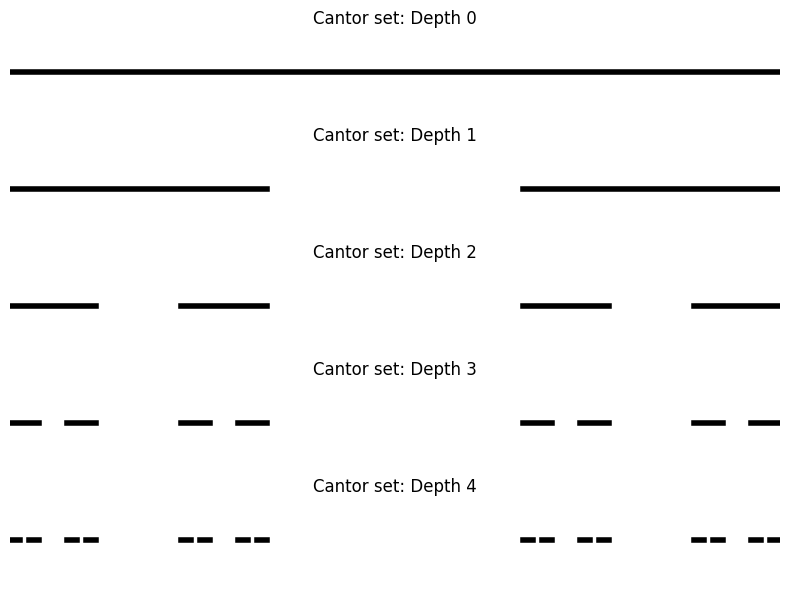

In [7]:
import matplotlib.pyplot as plt

def cantor_intervals(n, a=0, b=1):
    if n == 0:
        return [(a, b)]
    else:
        third = (b - a) / 3
        left = cantor_intervals(n-1, a, a+third)
        right = cantor_intervals(n-1, b-third, b)
        return left + right

# Generate intervals for different depths
depths = [0, 1, 2, 3, 4]
fig, axes = plt.subplots(len(depths), 1, figsize=(8,6))

for ax, d in zip(axes, depths):
    intervals = cantor_intervals(d)
    for (a, b) in intervals:
        ax.plot([a, b], [0, 0], 'k-', linewidth=4)
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.5, 0.5)
    ax.axis("off")
    ax.set_title(f"Cantor set: Depth {d}")

plt.tight_layout()
plt.show()


# Koch Snowflake

Enter the depth you want: 8


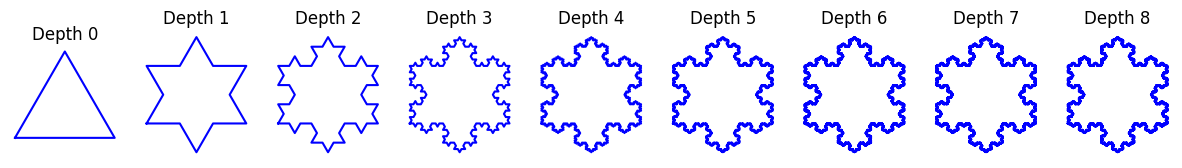

In [52]:
import matplotlib.pyplot as plt
import numpy as np

def koch_segment(p1, p2, depth):
    if depth == 0:
        return [p1, p2]
    else:
        p1 = np.array(p1)
        p2 = np.array(p2)

        # Divide into 3 equal parts
        v = (p2 - p1) / 3
        pA = p1 + v
        pB = p1 + 2*v

        # Change angle +/- for inward/outward
        angle = -np.pi/3
        rot = np.array([[np.cos(angle), -np.sin(angle)],
                        [np.sin(angle),  np.cos(angle)]])
        pPeak = pA + rot @ v

        # Recurse on 4 new segments
        seg1 = koch_segment(p1, pA, depth-1)
        seg2 = koch_segment(pA, pPeak, depth-1)
        seg3 = koch_segment(pPeak, pB, depth-1)
        seg4 = koch_segment(pB, p2, depth-1)

        return seg1[:-1] + seg2[:-1] + seg3[:-1] + seg4

def koch_snowflake(depth):
    # Original points
    p1 = (0, 0)
    p2 = (1, 0)
    p3 = (0.5, np.sqrt(3)/2)

    side1 = koch_segment(p1, p2, depth)
    side2 = koch_segment(p2, p3, depth)
    side3 = koch_segment(p3, p1, depth)

    return side1[:-1] + side2[:-1] + side3

# Plot multiple depths
depth = int(input("Enter the depth you want: "))
depths = [x for x in range(depth + 1)]
fig, axes = plt.subplots(1, len(depths), figsize=(15,3))

for ax, d in zip(axes, depths):
    snowflake = koch_snowflake(d)
    xs, ys = zip(*snowflake)
    ax.plot(xs, ys, 'b-')
    ax.set_aspect('equal')
    ax.axis("off")
    ax.set_title(f"Depth {d}")

plt.show()

# Sierpiński Triangle

Enter the depth you want:8


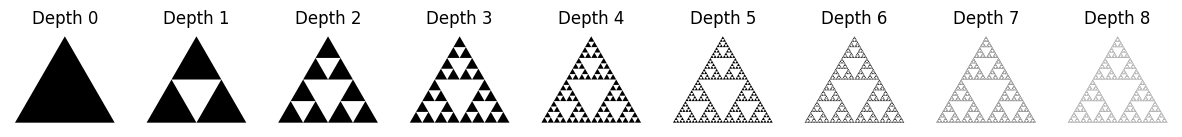

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def sierpinski_triangle(p1, p2, p3, depth):
    if depth == 0:
        return [[p1, p2, p3]]
    else:
        # Midpoints of each side
        m12 = ((p1[0] + p2[0]) / 2, (p1[1] + p2[1]) / 2)
        m23 = ((p2[0] + p3[0]) / 2, (p2[1] + p3[1]) / 2)
        m31 = ((p3[0] + p1[0]) / 2, (p3[1] + p1[1]) / 2)

        # Recurse on 3 corner triangles
        t1 = sierpinski_triangle(p1, m12, m31, depth-1)
        t2 = sierpinski_triangle(p2, m23, m12, depth-1)
        t3 = sierpinski_triangle(p3, m31, m23, depth-1)

        return t1 + t2 + t3

# Initial triangle vertices
p1 = (0, 0)
p2 = (1, 0)
p3 = (0.5, np.sqrt(3)/2)

# Plot for multiple depths
depth = int(input("Enter the depth you want:"))
depths = [x for x in range(depth+1)]
fig, axes = plt.subplots(1, len(depths), figsize=(15,3))

for ax, d in zip(axes, depths):
    triangles = sierpinski_triangle(p1, p2, p3, d)
    for tri in triangles:
        xs, ys = zip(*tri + [tri[0]])  # close triangle
        ax.fill(xs, ys, 'k')
    ax.set_aspect('equal')
    ax.axis("off")
    ax.set_title(f"Depth {d}")

plt.show()


# Recursive Fractal Interpolation for n-points

Enter number of points: 7


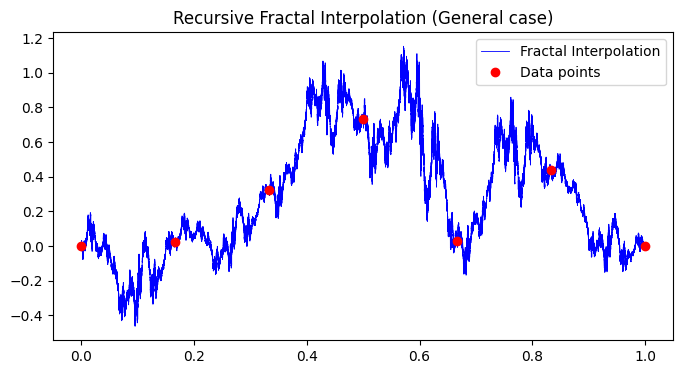

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import random

def build_fif_maps(points, alphas):
    x0, y0 = points[0]
    xN, yN = points[-1]
    maps = []

    for i in range(1, len(points)):
        xi_1, yi_1 = points[i-1]
        xi, yi = points[i]
        alpha_i = alphas[i-1]

        a_i = (xi - xi_1) / (xN - x0)
        e_i = (xN*xi_1 - x0*xi) / (xN - x0)

        b_i = (yi - yi_1 - alpha_i * (yN - y0)) / (xN - x0)
        f_i = yi_1 - alpha_i * y0 - b_i * x0

        maps.append((a_i, e_i, alpha_i, b_i, f_i))
    return maps

def recursive_iteration(maps, depth, x_start, x_end, y_start, y_end):
    if depth == 0:
        return [(x_start, y_start), (x_end, y_end)]

    points_list = []
    for (a_i, e_i, alpha_i, b_i, f_i) in maps:
        # Apply affine map to endpoints
        x_left = a_i * x_start + e_i
        y_left = alpha_i * y_start + b_i * x_start + f_i

        x_right = a_i * x_end + e_i
        y_right = alpha_i * y_end + b_i * x_end + f_i

        # Recurse deeper
        sub_points = recursive_iteration(maps, depth - 1, x_left, x_right, y_left, y_right)
        points_list.extend(sub_points[:-1])  # avoid duplicates
    points_list.append((x_end, y_end))
    return points_list

# -------------------------------
# Random generator of n-interpolation points
# -------------------------------

n = int(input("Enter number of points: "))  # total number of points
denom = 1 / (n - 1)

# First and last fixed at y=0, middle are random
points = [(i*denom, random.random()) for i in range(1, n-1)]
points = [(0,0)] + points + [(1,0)]

# Random alphas, one per interval (can set alpha according to reqs)
alphas = [random.uniform(-0.8, 0.8) for _ in range(len(points)-1)]

maps = build_fif_maps(points, alphas)


# Run deterministic recursion
rec_points = recursive_iteration(
    maps, depth=8,
    x_start=points[0][0], x_end=points[-1][0],
    y_start=points[0][1], y_end=points[-1][1]
)


rec_points = sorted(rec_points, key=lambda p: p[0])
rec_x, rec_y = zip(*rec_points)

# Plot
plt.figure(figsize=(8,4))
px, py = zip(*points)
plt.plot(rec_x, rec_y, 'b-', linewidth=0.6, label="Fractal Interpolation")
plt.plot(px, py, 'ro', label="Data points")
plt.legend()
plt.title("Recursive Fractal Interpolation (General case)")
plt.show()